<a href="https://colab.research.google.com/github/ProfKlein/github.io/blob/main/IRGA_Maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Colab notebook for inter-country comparison**

## Introduction

We will use **Python** and its **pandas** library to compare GDP, exports and imports of countries. We will show the results of our calculations on a world map.

## Python basics

In [ ]:
# print("Hello world!")

## Importing Python libraries for data science

In [ ]:
import numpy as np
import pandas as pd

## Importing data on real GDP per capita from the IMF's World Economic Outlook (WEO)

In [ ]:
dtype_dict = {str(c) : np.float64 for c in range(1980, 2030)}
gdppc = pd.read_csv("https://profklein.github.io/github.io/weo/weo_gdppc.csv", dtype=dtype_dict, index_col="ISO")
gdppc.columns = [int(c) if c.isdigit() else c for c in gdppc.columns]

The Python variable "gdppc" contains the data on real GDP per capita for all countries in the WEO. But what "is" gdppc? Because we imported the data using a method from the pandas library ("read_csv"), gdppc is now a so-called "pandas dataframe".

We can check this with pandas "type" function:

In [ ]:
type(gdppc)

pandas.core.frame.DataFrame

A pandas dataframe looks like an Excel table with rows and columns of data.

In [ ]:
gdppc.head(3)

,WEO Country Code,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,1981,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,Estimates Start After
ISO,,,,,,,,,,,,,,,,,,,,,
AFG,512,NGDPRPPPPC,Afghanistan,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",NaN,NaN,...,1945.371,1793.916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023.0
ALB,914,NGDPRPPPPC,Albania,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",5557.555,5757.844,...,14639.597,15383.880,15935.294,16476.659,17090.905,17750.321,18431.571,19144.767,19889.199,2021.0
DZA,612,NGDPRPPPPC,Algeria,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,Units,"See notes for: Gross domestic product, consta...",10218.263,10207.634,...,12281.106,12524.602,12854.883,13162.677,13391.670,13557.343,13679.396,13802.240,13927.054,2019.0


## Importing population data from the IMF's World Economic Outlook (WEO)

In [ ]:
dtype_dict = {str(c) : np.float64 for c in range(1980, 2030)}
pop = pd.read_csv("https://profklein.github.io/github.io/weo/weo_pop.csv", dtype=dtype_dict, index_col="ISO")
pop.columns = [int(c) if c.isdigit() else c for c in pop.columns]

"pop", similar to "gdppc", is a pandas Dataframe.

In [ ]:
pop.head(3)

,WEO Country Code,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,1981,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,Estimates Start After
ISO,,,,,,,,,,,,,,,,,,,,,
AFG,512,LP,Afghanistan,Population,"For census purposes, the total population of t...",Persons,Millions,Source: National Statistics Office Latest actu...,NaN,NaN,...,33.698,34.263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023.0
ALB,914,LP,Albania,Population,"For census purposes, the total population of t...",Persons,Millions,Source: National Statistics Office. INSTAT Lat...,2.672,2.726,...,2.873,2.866,2.858,2.850,2.840,2.831,2.821,2.810,2.799,2021.0
DZA,612,LP,Algeria,Population,"For census purposes, the total population of t...",Persons,Millions,Source: National Statistics Office Latest actu...,18.666,19.246,...,44.577,45.291,45.973,46.626,47.251,47.851,48.425,49.006,49.594,2019.0


"gdppc" and "pop" have the same format. Same number of rows and same number of columns. The difference is that "gdp" contains the data on real GDP per capita while "pop" contains the data on population.

## Diagram: GDP per capita (in PPP dollars), 1990 - 2023

Define a list of countries, using their ISO alpha-3 codes:

In [ ]:
countries = ["USA", "ITA", "POL", "TUR", "RUS", "CHN"]

Define a range of years, using Python's built-in range function

In [ ]:
years = range(1990, 2024)

Use panda's "loc" method to get WEO GDP data for a list of countries during the chosen years.

loc[rows, columns] takes two arguments: a list of row names and a list of column names. It is added to the name of the dataframe with a connecting dot "."

<Axes: >

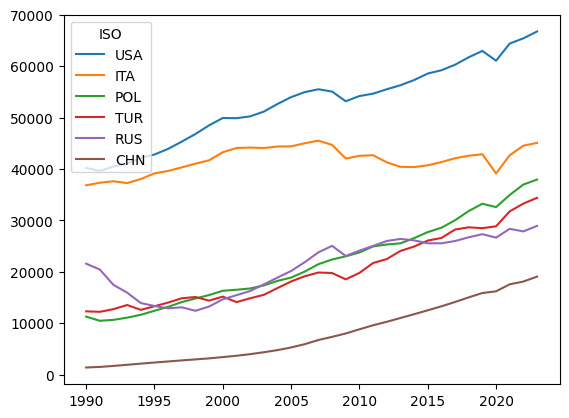

In [ ]:
gdppc.loc[countries, years].T.plot()

## Diagram: Comparing countries by "size", population vs. real GDP

Country size can be defined in many ways. Here we use two measures: population and real GDP.

Population data are given (-> pop). But what about real GDP? So far we have compared countries' real GDP **per capita**. To compare their **total** real GDP, we multiply real GDP per capita by population.

Using pandas, we can do this with one command for all countries simply by multiplying the dataframe "gdppc" with the dataframe "pop". We just have to make sure that we select only those columns of the dataframes that contain the relevant numbers, i.e. without the columns containing the descriptive (textual) information. In order to accomplish this, we again use pandas' "loc" method, selecting all rows but only the columns for the years.

In [ ]:
gdp = gdppc.loc[:, years] * pop.loc[:, years]

Now we can make a diagram comparing countries' total GDP.

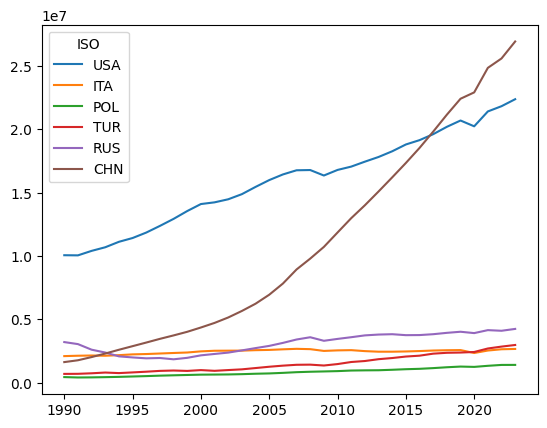

In [ ]:
p = gdp.loc[countries, :].T.plot()
# p.set_yscale("log")

## Comparing countries with **choropleth maps**

Importing *plotly express*, Python library for plotting.

In [ ]:
import plotly.express as px

Create a choropleth map of the world

In [ ]:
fig = px.choropleth(gdppc.reset_index(), # <- change source: pop, gdppc or gdp
                    locations='ISO',
                    locationmode='ISO-3',
                    color = 2022,
                    color_continuous_scale='Plasma')

# Center the title; adjust the text of the title as you wish
fig.update_layout(title={'text': 'Choropleth Map of Countries', 'x': 0.5, 'xanchor': 'center'})

# Show the plot
fig.show()